In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
languages = ["tr", "sw", "ta", "id", "zh"]

epochs = ["best"]

setups = ["5k", "25k", "45k", "65k", "full"]

seeds = ["seed1", "seed2", "seed3"]

In [4]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [5]:
lang_results = {}
for lang in languages:

    setup_results = {}

    for setup in setups:
        seed_results = {}
        for seed in seeds:
            if lang == "tr":
                with open(path_to_repo + "experiment_1/varying_finetune_data/{setup}/{s}/test/pytorch_model_best.bin-/eval.txt".format(setup = setup, s = seed)) as f:
                    lines = f.readlines()
                    score = float(lines[0].split(" ")[-2])
                seed_results[seed] = score
            else:
                with open(path_to_repo + "experiment_1/varying_finetune_data/{l}/{setup}/{s}/test/pytorch_model_best.bin-/eval.txt".format(l = lang, setup = setup, s = seed)) as f:
                    lines = f.readlines()
                    score = float(lines[0].split(" ")[-2])
                seed_results[seed] = score 
        setup_results[setup] = seed_results  
    
    lang_results[lang] = setup_results

In [7]:
def get_avg_std(lang, lang_results):
    results = lang_results[lang]

    means = []
    stds = []

    for setup in setups:
        setup_results = np.asarray([results[setup]["seed1"], results[setup]["seed2"], results[setup]["seed3"]])
        means.append(setup_results.mean())
        stds.append(setup_results.std())
    
    return means, stds

In [36]:
def plot_results(lang, means, stds, ylim=[54, 58]):
    # Set figure default figure size
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.rcParams['figure.dpi'] = 300

    x = [5, 25, 45, 65, 86]
    y = np.asarray(means)

    plt.plot(x, y, linestyle="-", marker="o", color="red", markersize=10, label="best on NLVR2 validation")

    plt.fill_between(x, y-stds, y+stds, color="lightcoral", alpha=0.2)

    plt.xticks(ticks=[5, 25, 45, 65, 86], 
               labels=["5k", "25k", "45k", "65k", "86k (full)"])
    plt.xlabel("Amount of finetuning (NLVR2) entries")
    plt.title("{l}".format(l = lang))
    plt.ylabel("Accuracy (%)")
    plt.ylim(ylim)
    plt.legend()
    plt.grid(axis="both")
    plt.show()

### SW

In [15]:
means_sw, stds_sw = get_avg_std("sw", lang_results)

In [16]:
means_sw

[54.302,
 55.26433333333333,
 55.324666666666666,
 54.903999999999996,
 54.81333333333333]

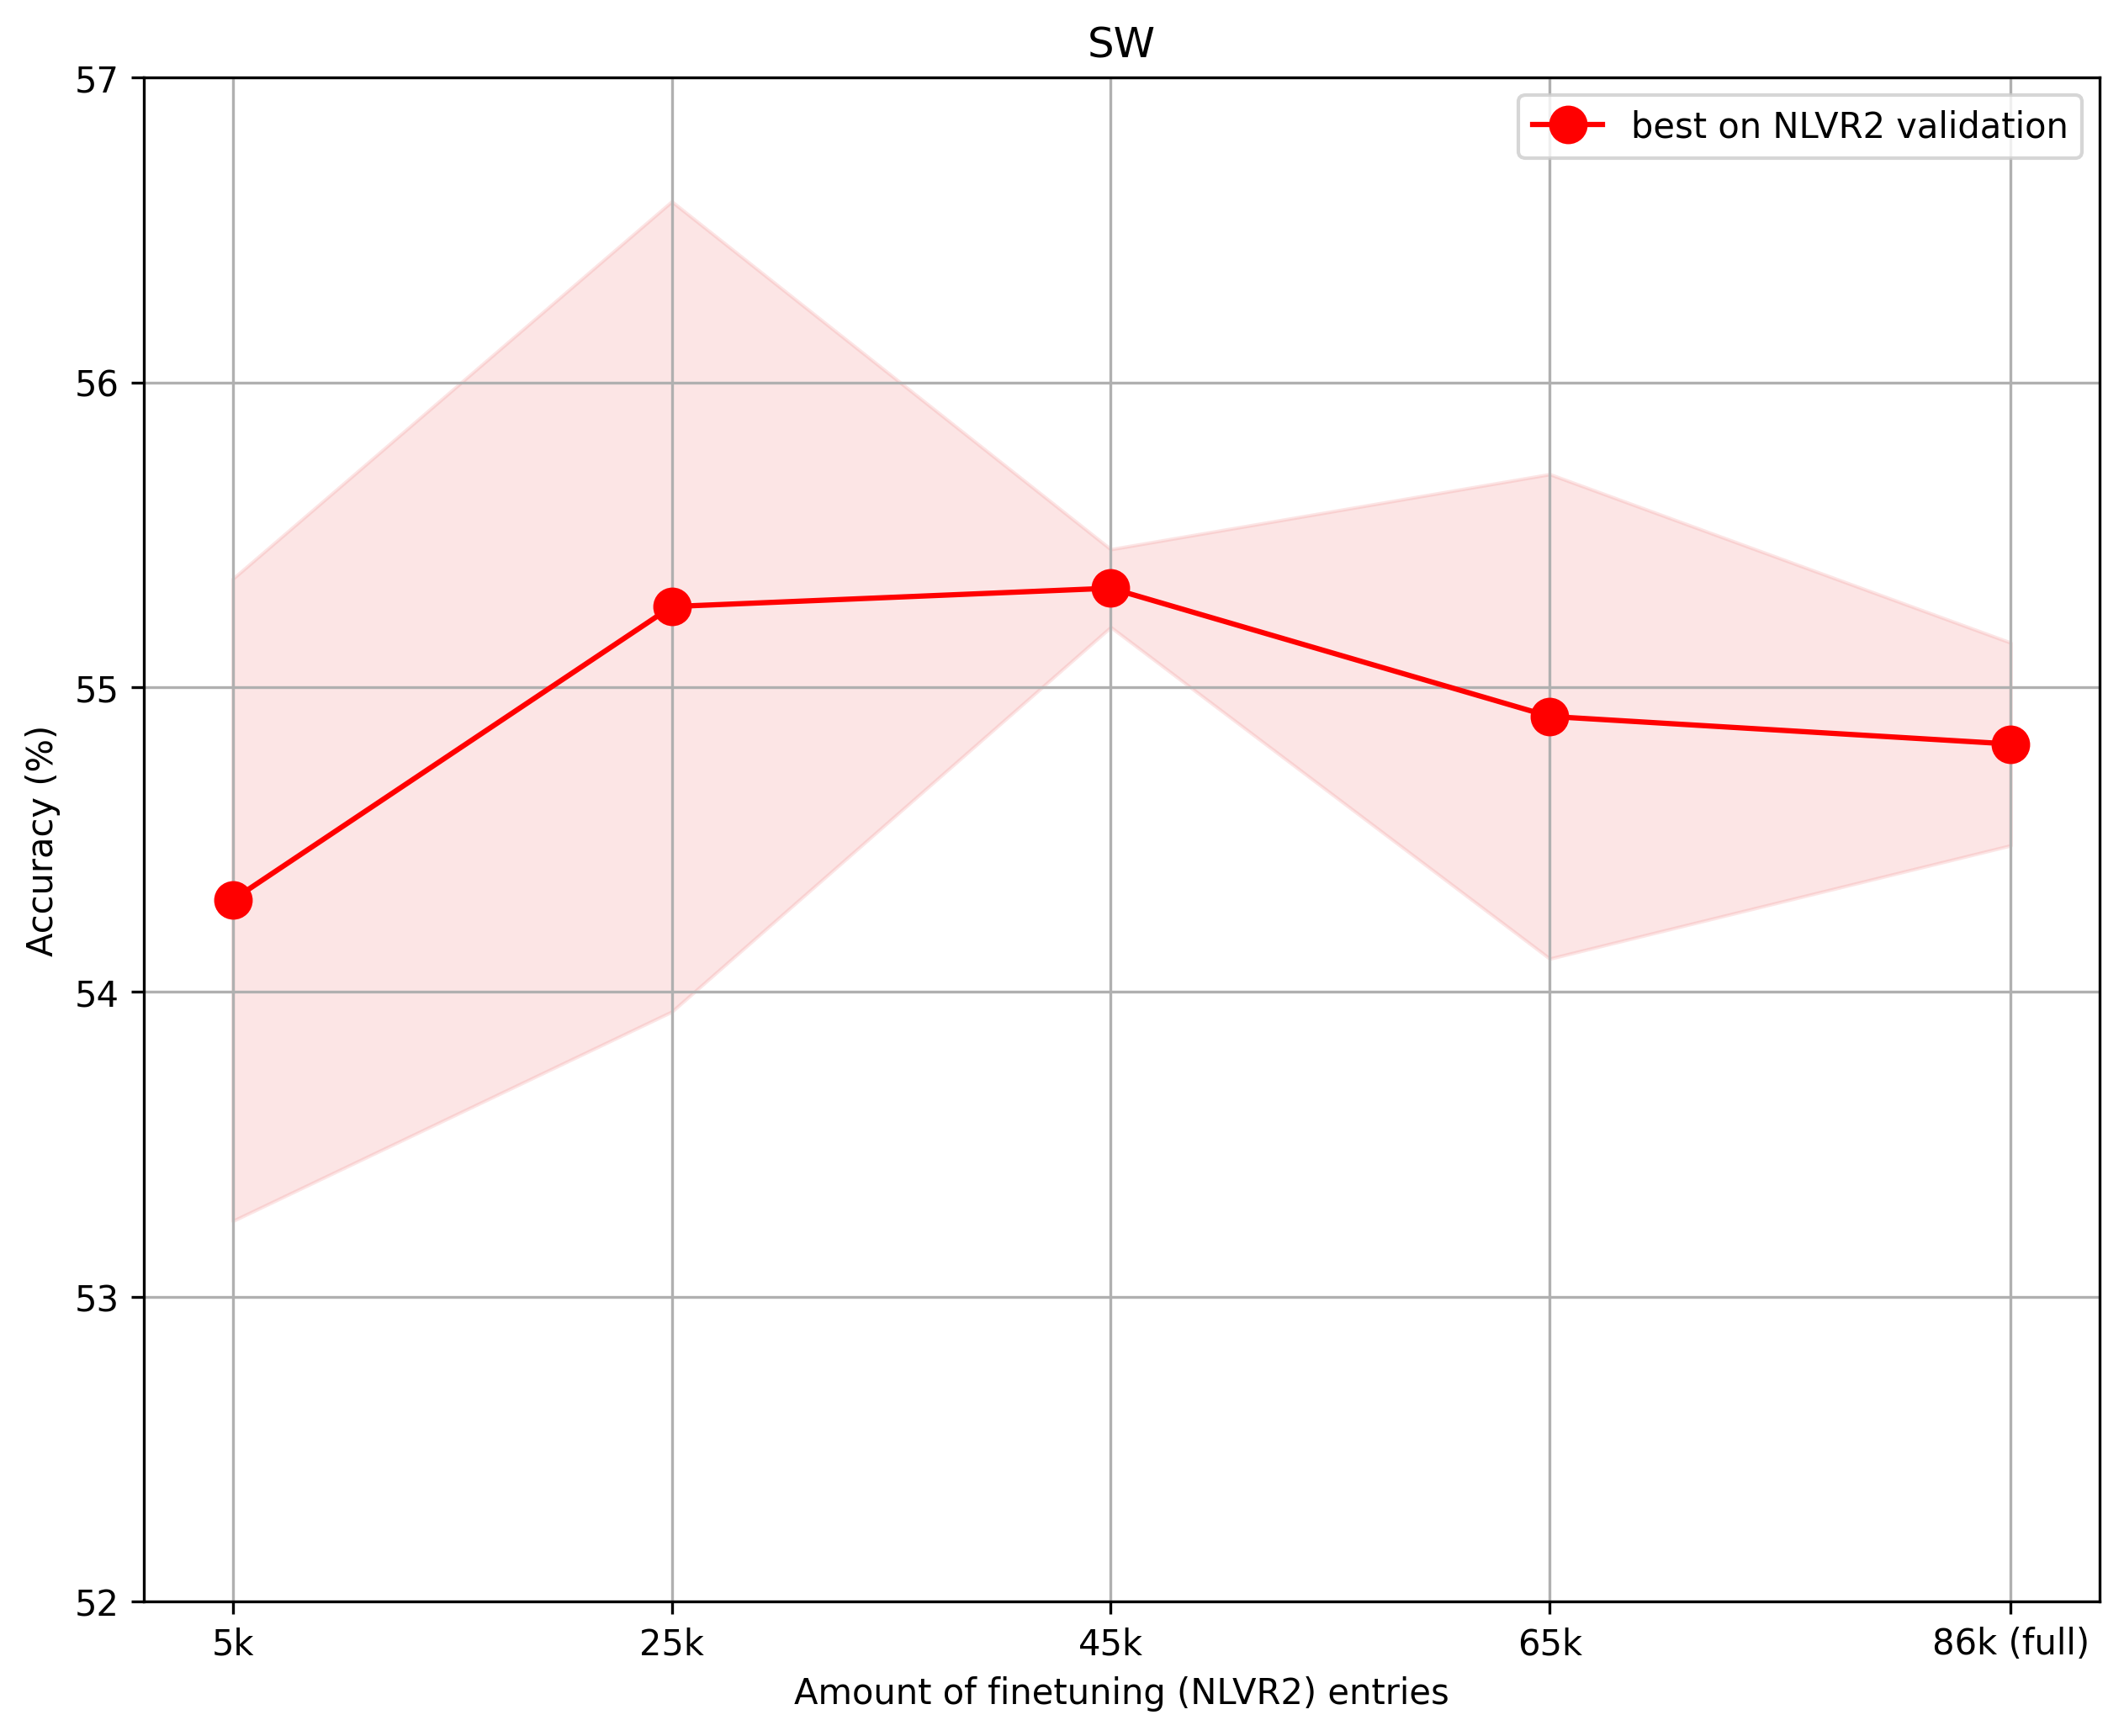

In [17]:
plot_results("sw", means_sw, stds_sw, [52, 57])

### TA

In [18]:
means_ta, stds_ta = get_avg_std("ta", lang_results)

In [20]:
means_ta

[53.650000000000006,
 54.50866666666667,
 54.266999999999996,
 53.59633333333333,
 54.025666666666666]

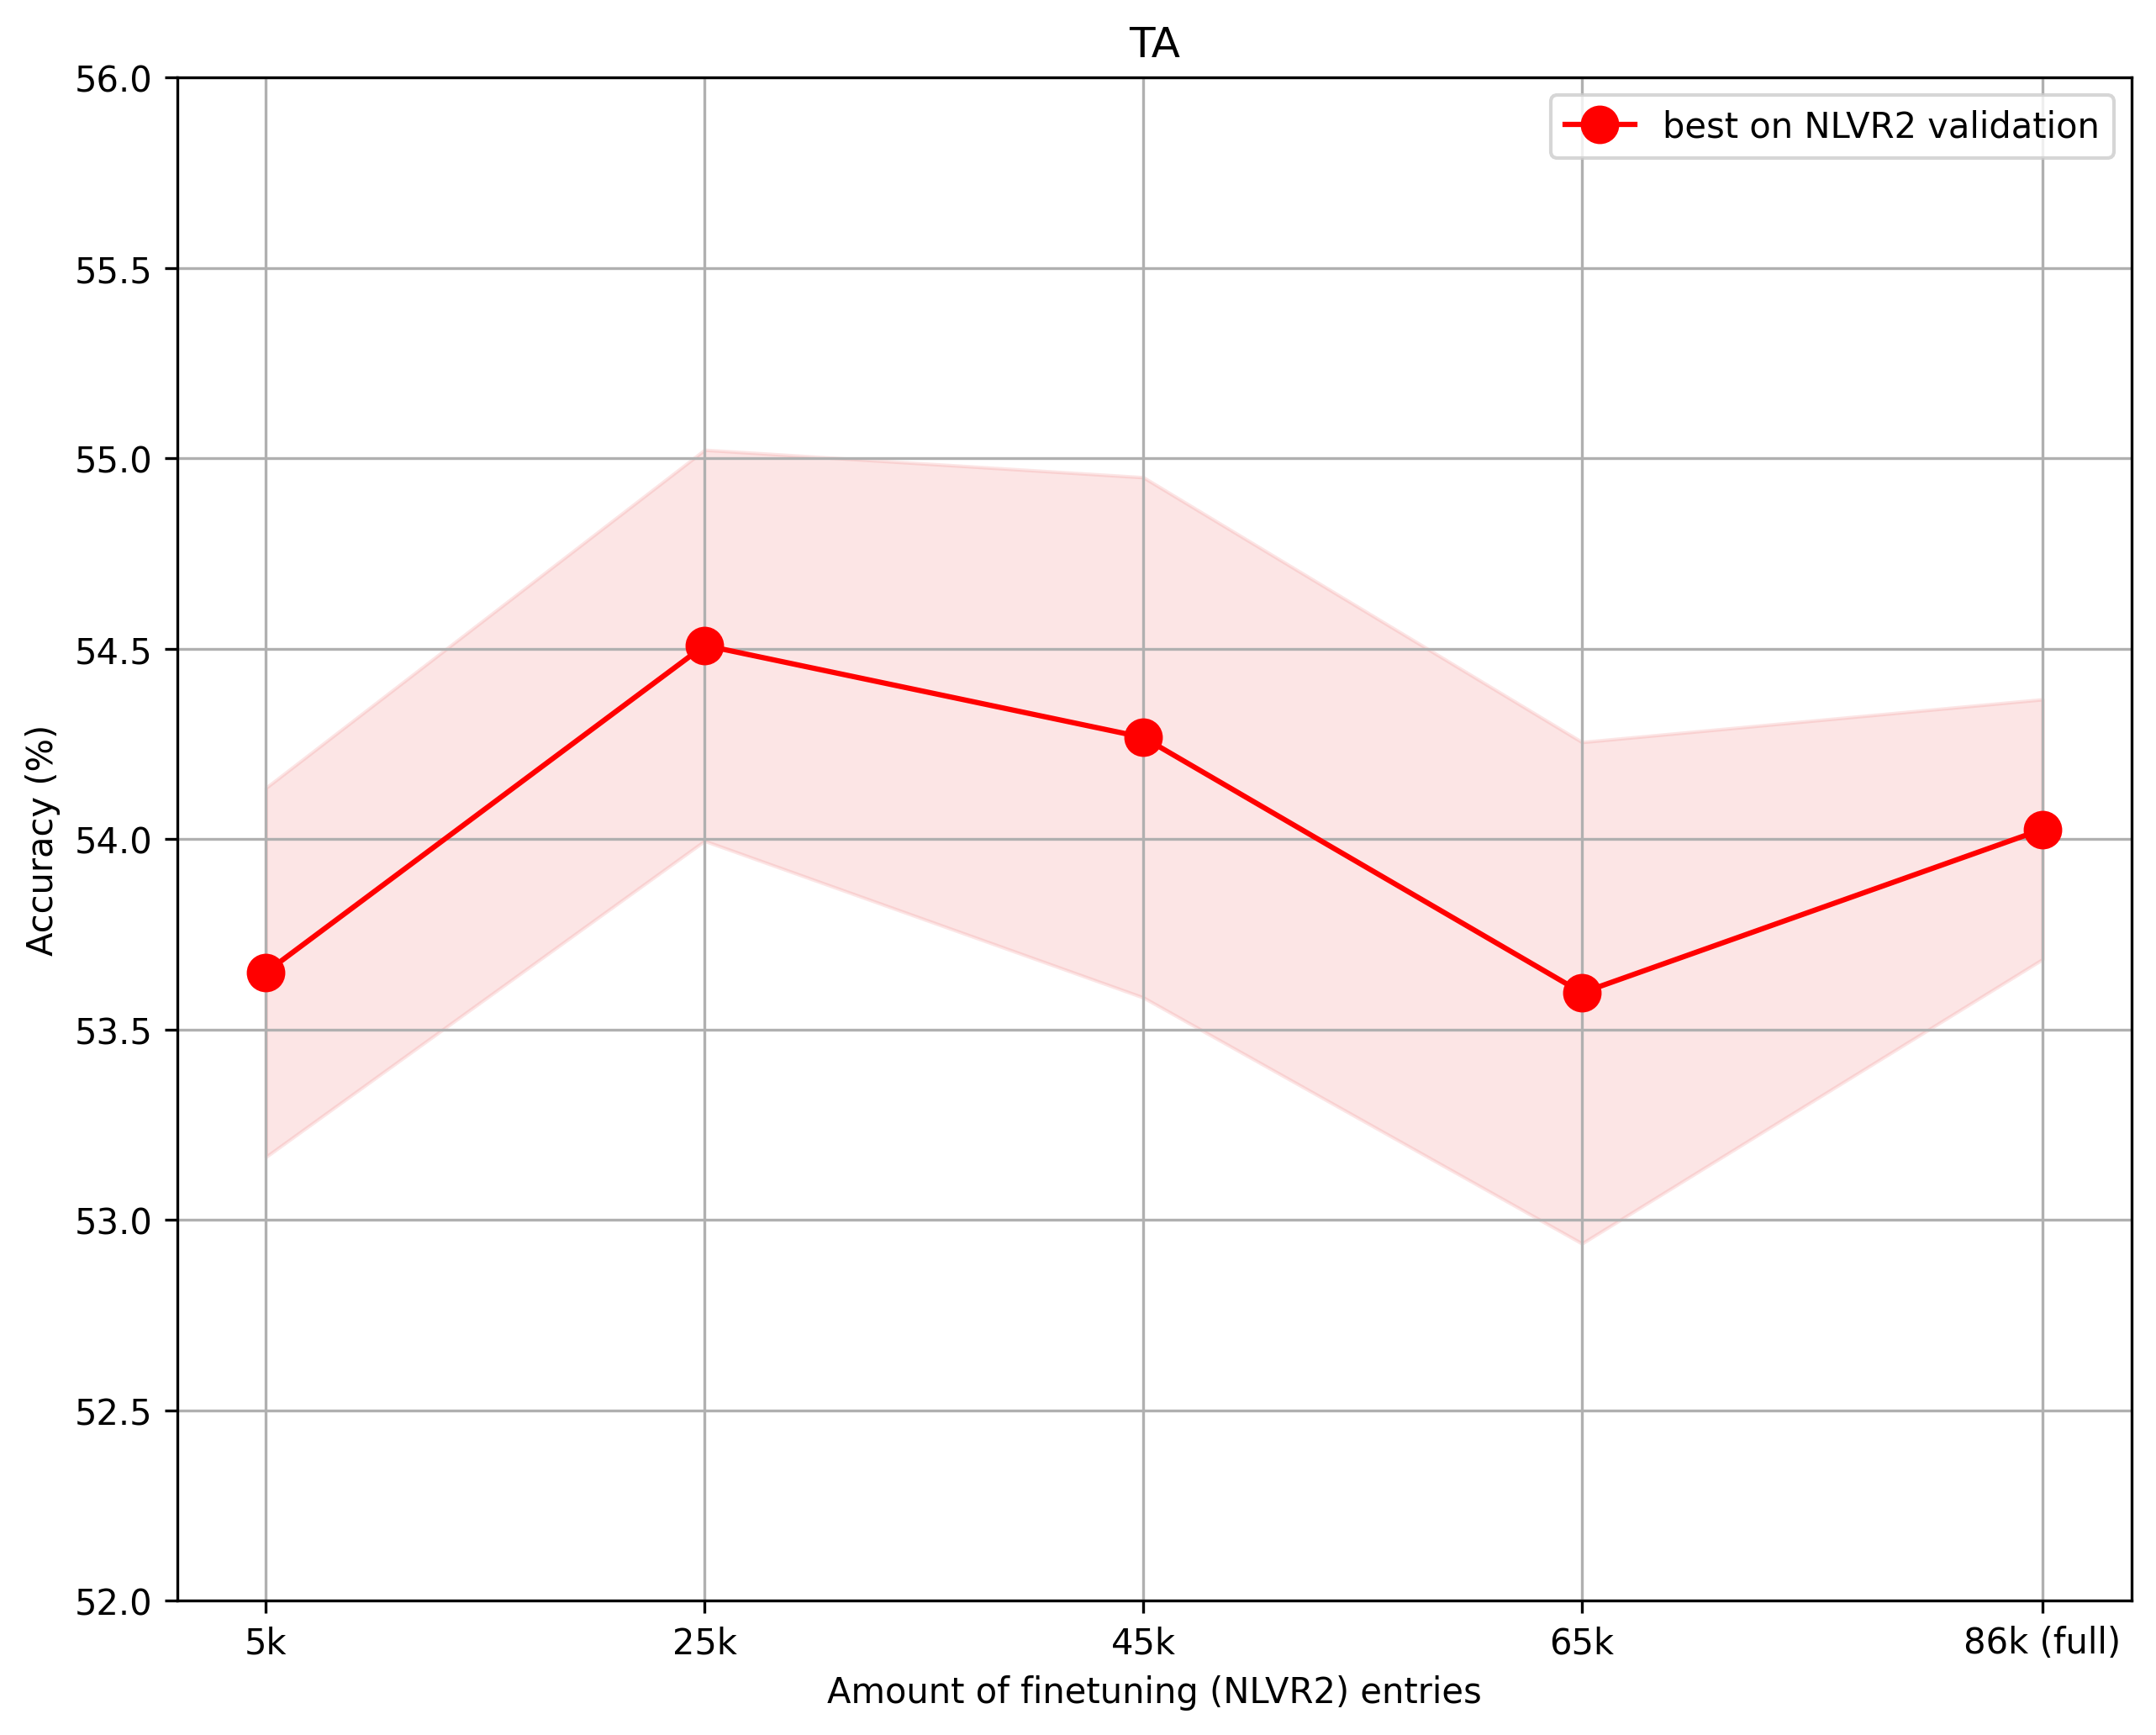

In [21]:
plot_results("ta", means_ta, stds_ta, [52, 56])

### TR

In [22]:
means_tr, stds_tr = get_avg_std("tr", lang_results)

In [24]:
means_tr

[55.790666666666674,
 57.34466666666666,
 55.705999999999996,
 55.39566666666667,
 55.84733333333333]

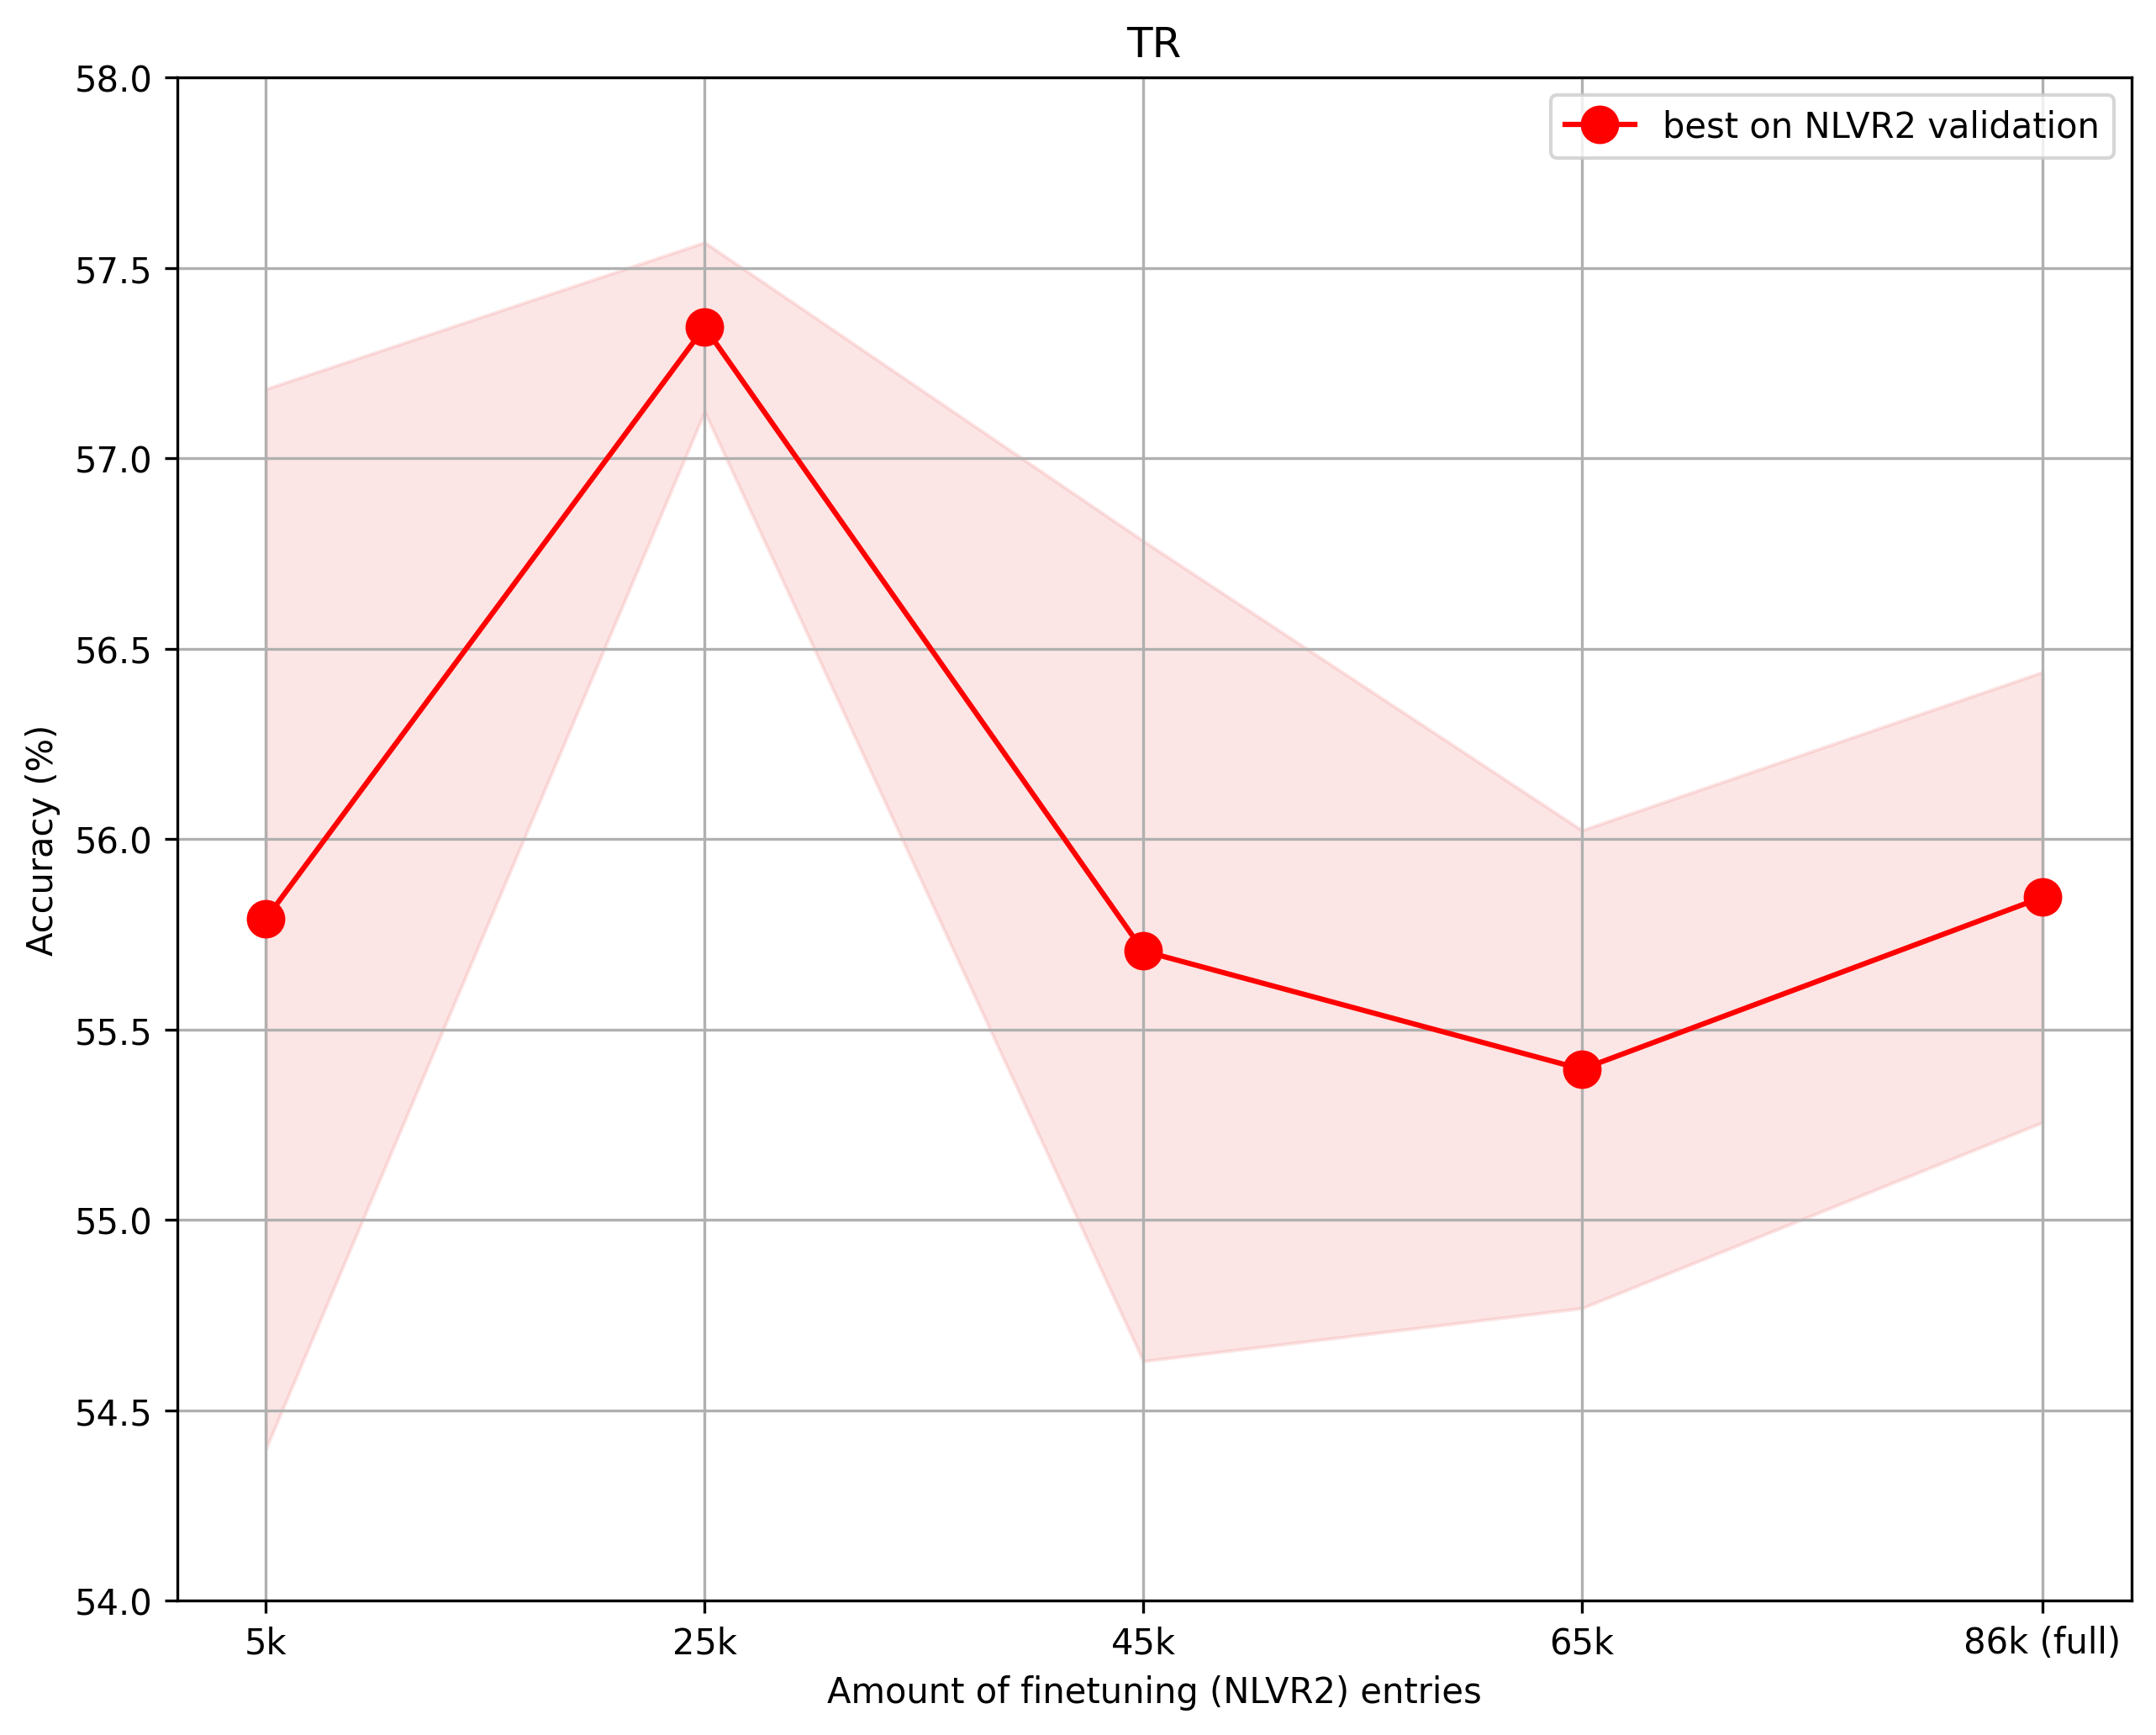

In [23]:
plot_results("tr", means_tr, stds_tr, [54, 58])

### ID

In [25]:
means_id, stds_id = get_avg_std("id", lang_results)

In [27]:
means_id

[55.08266666666666,
 56.56066666666667,
 54.90566666666666,
 55.02366666666668,
 55.26]

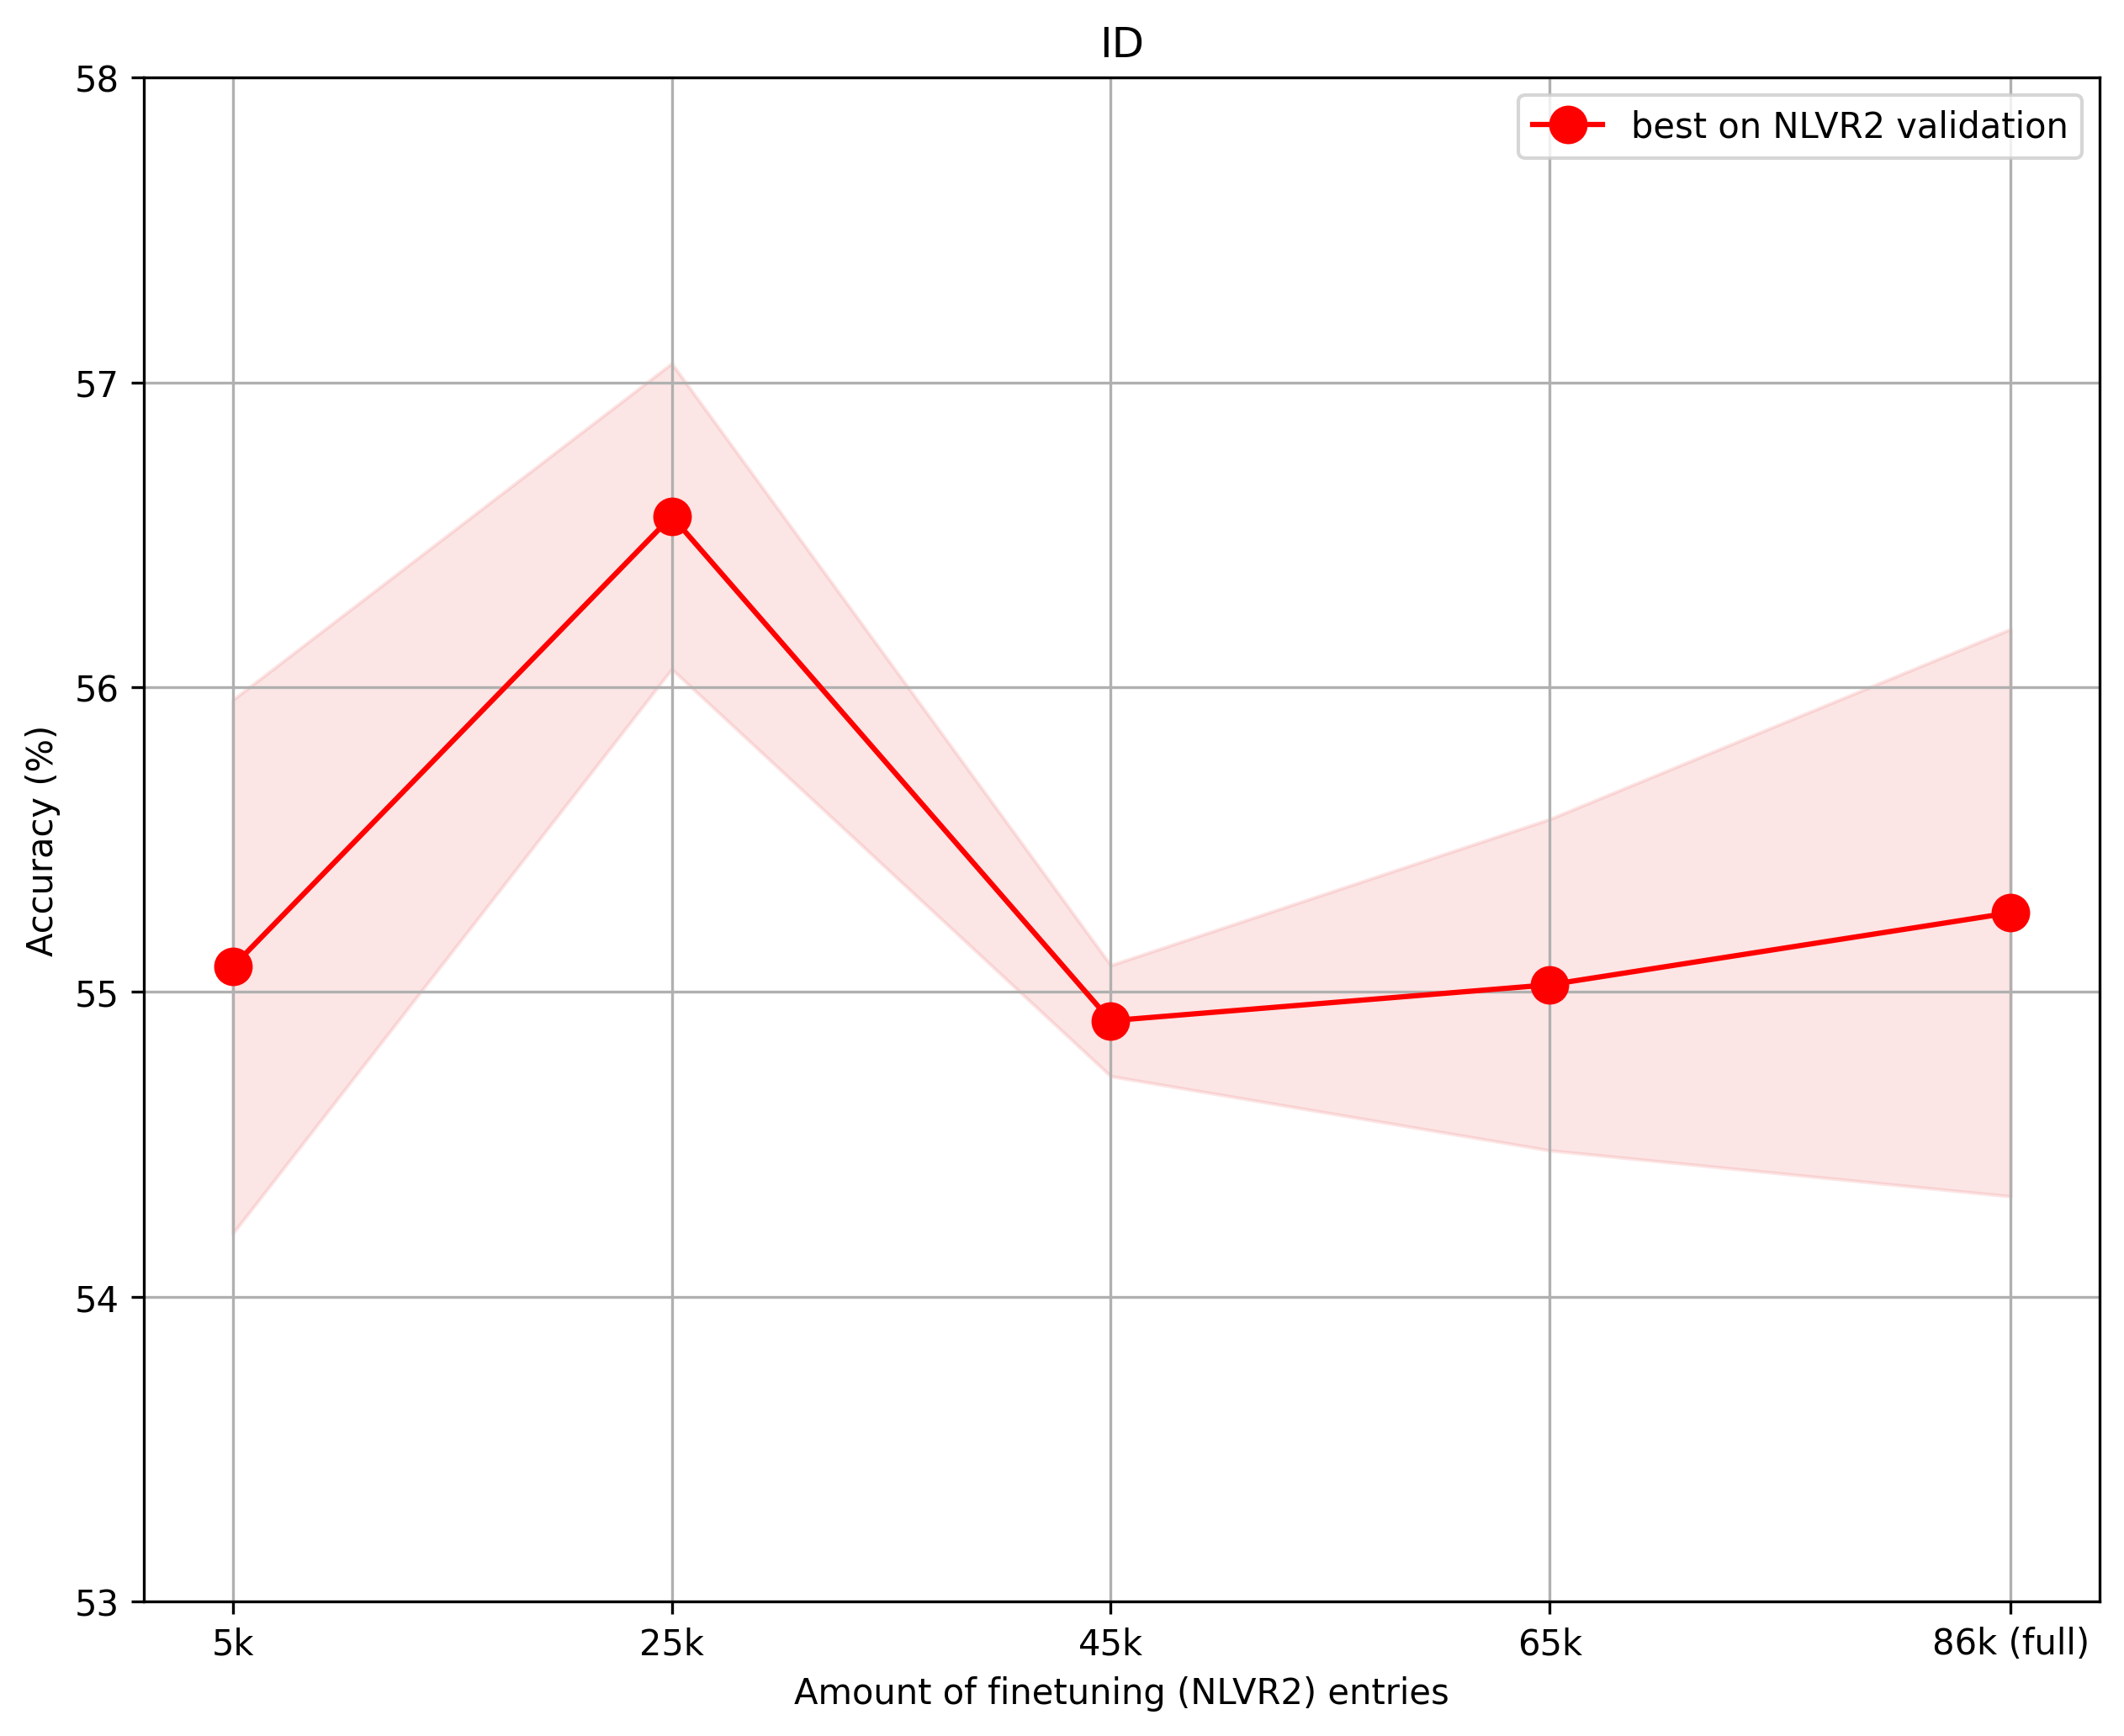

In [26]:
plot_results("id", means_id, stds_id, [53, 58])

### ZH

In [28]:
means_zh, stds_zh = get_avg_std("zh", lang_results)

In [30]:
means_zh

[55.73133333333334, 55.23733333333333, 55.434666666666665, 54.809, 55.27]

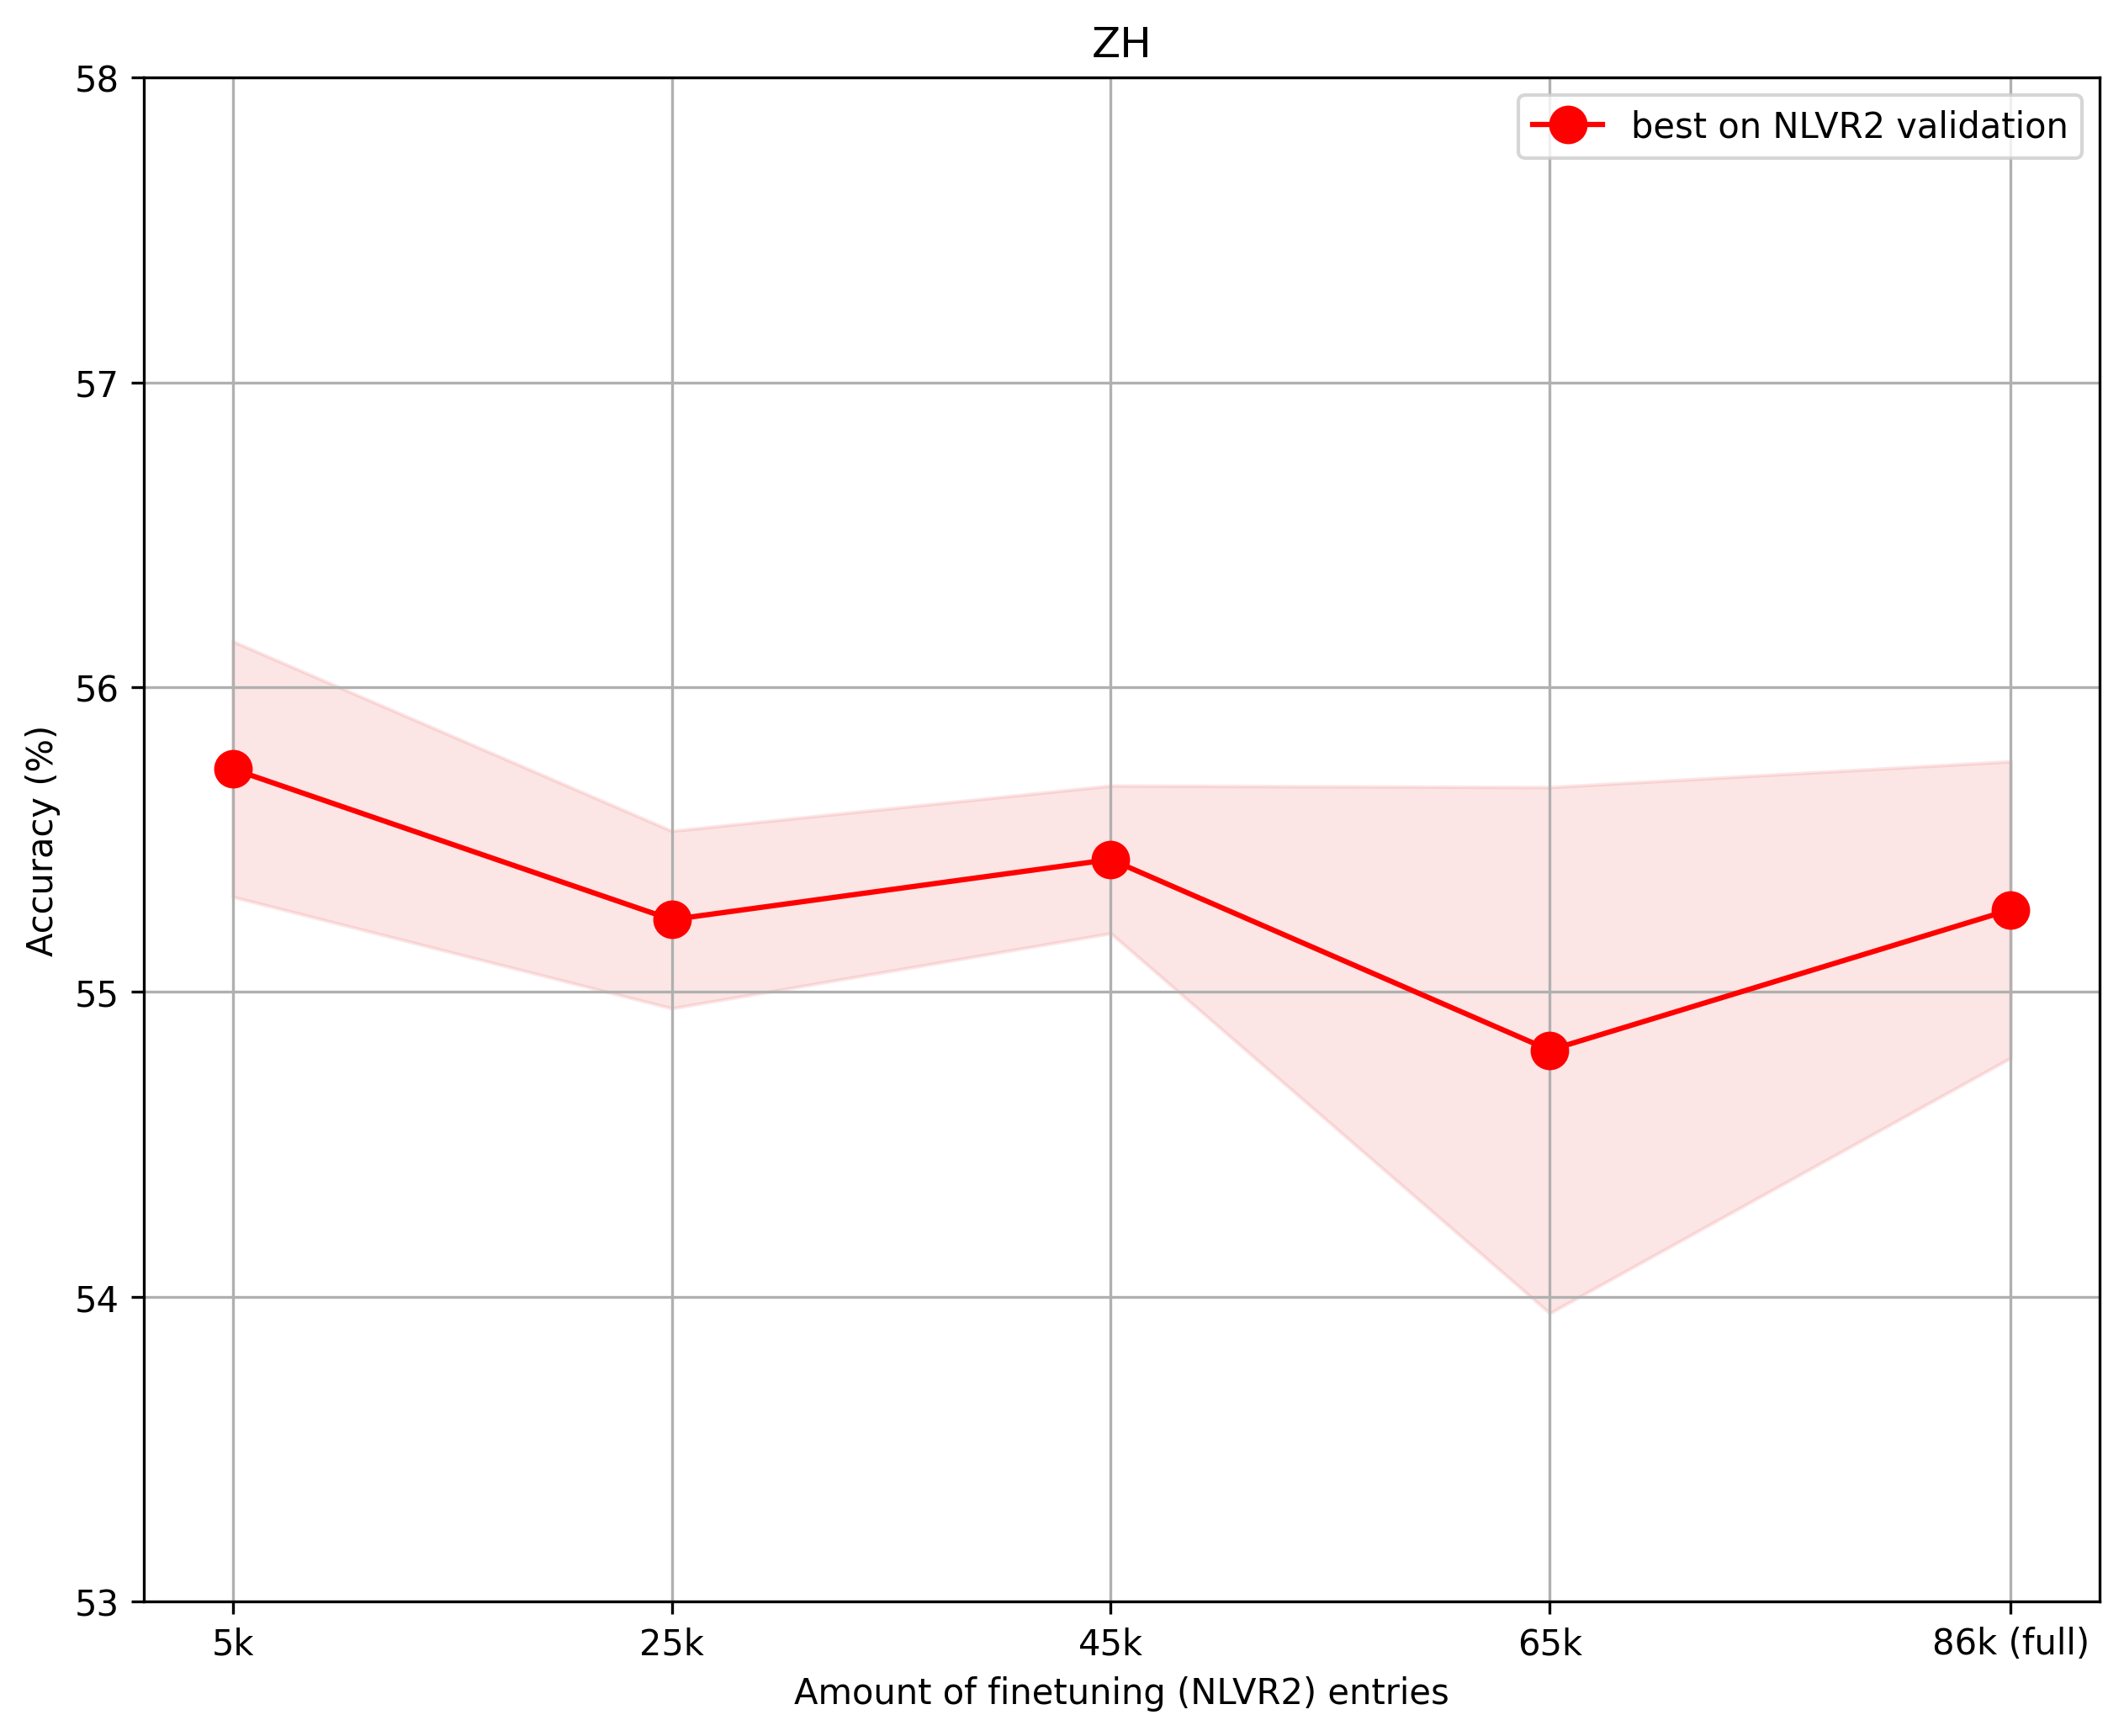

In [29]:
plot_results("zh", means_zh, stds_zh, [53, 58])

### ALL

In [32]:
def get_all_avg_std(lang_results):

    means = []
    stds = []

    for setup in setups:
        setup_results = []
        for lang in languages:
            setup_results.append(lang_results[lang][setup]["seed1"])
            setup_results.append(lang_results[lang][setup]["seed2"])
            setup_results.append(lang_results[lang][setup]["seed2"])
                
        np_results = np.asarray(setup_results)
        means.append(np_results.mean())
        stds.append(np_results.std())
    
    return means, stds

In [33]:
means_all, stds_all = get_all_avg_std(lang_results)

In [35]:
means_all

[54.85393333333333, 55.51213333333333, 55.0116, 54.8122, 54.861200000000004]

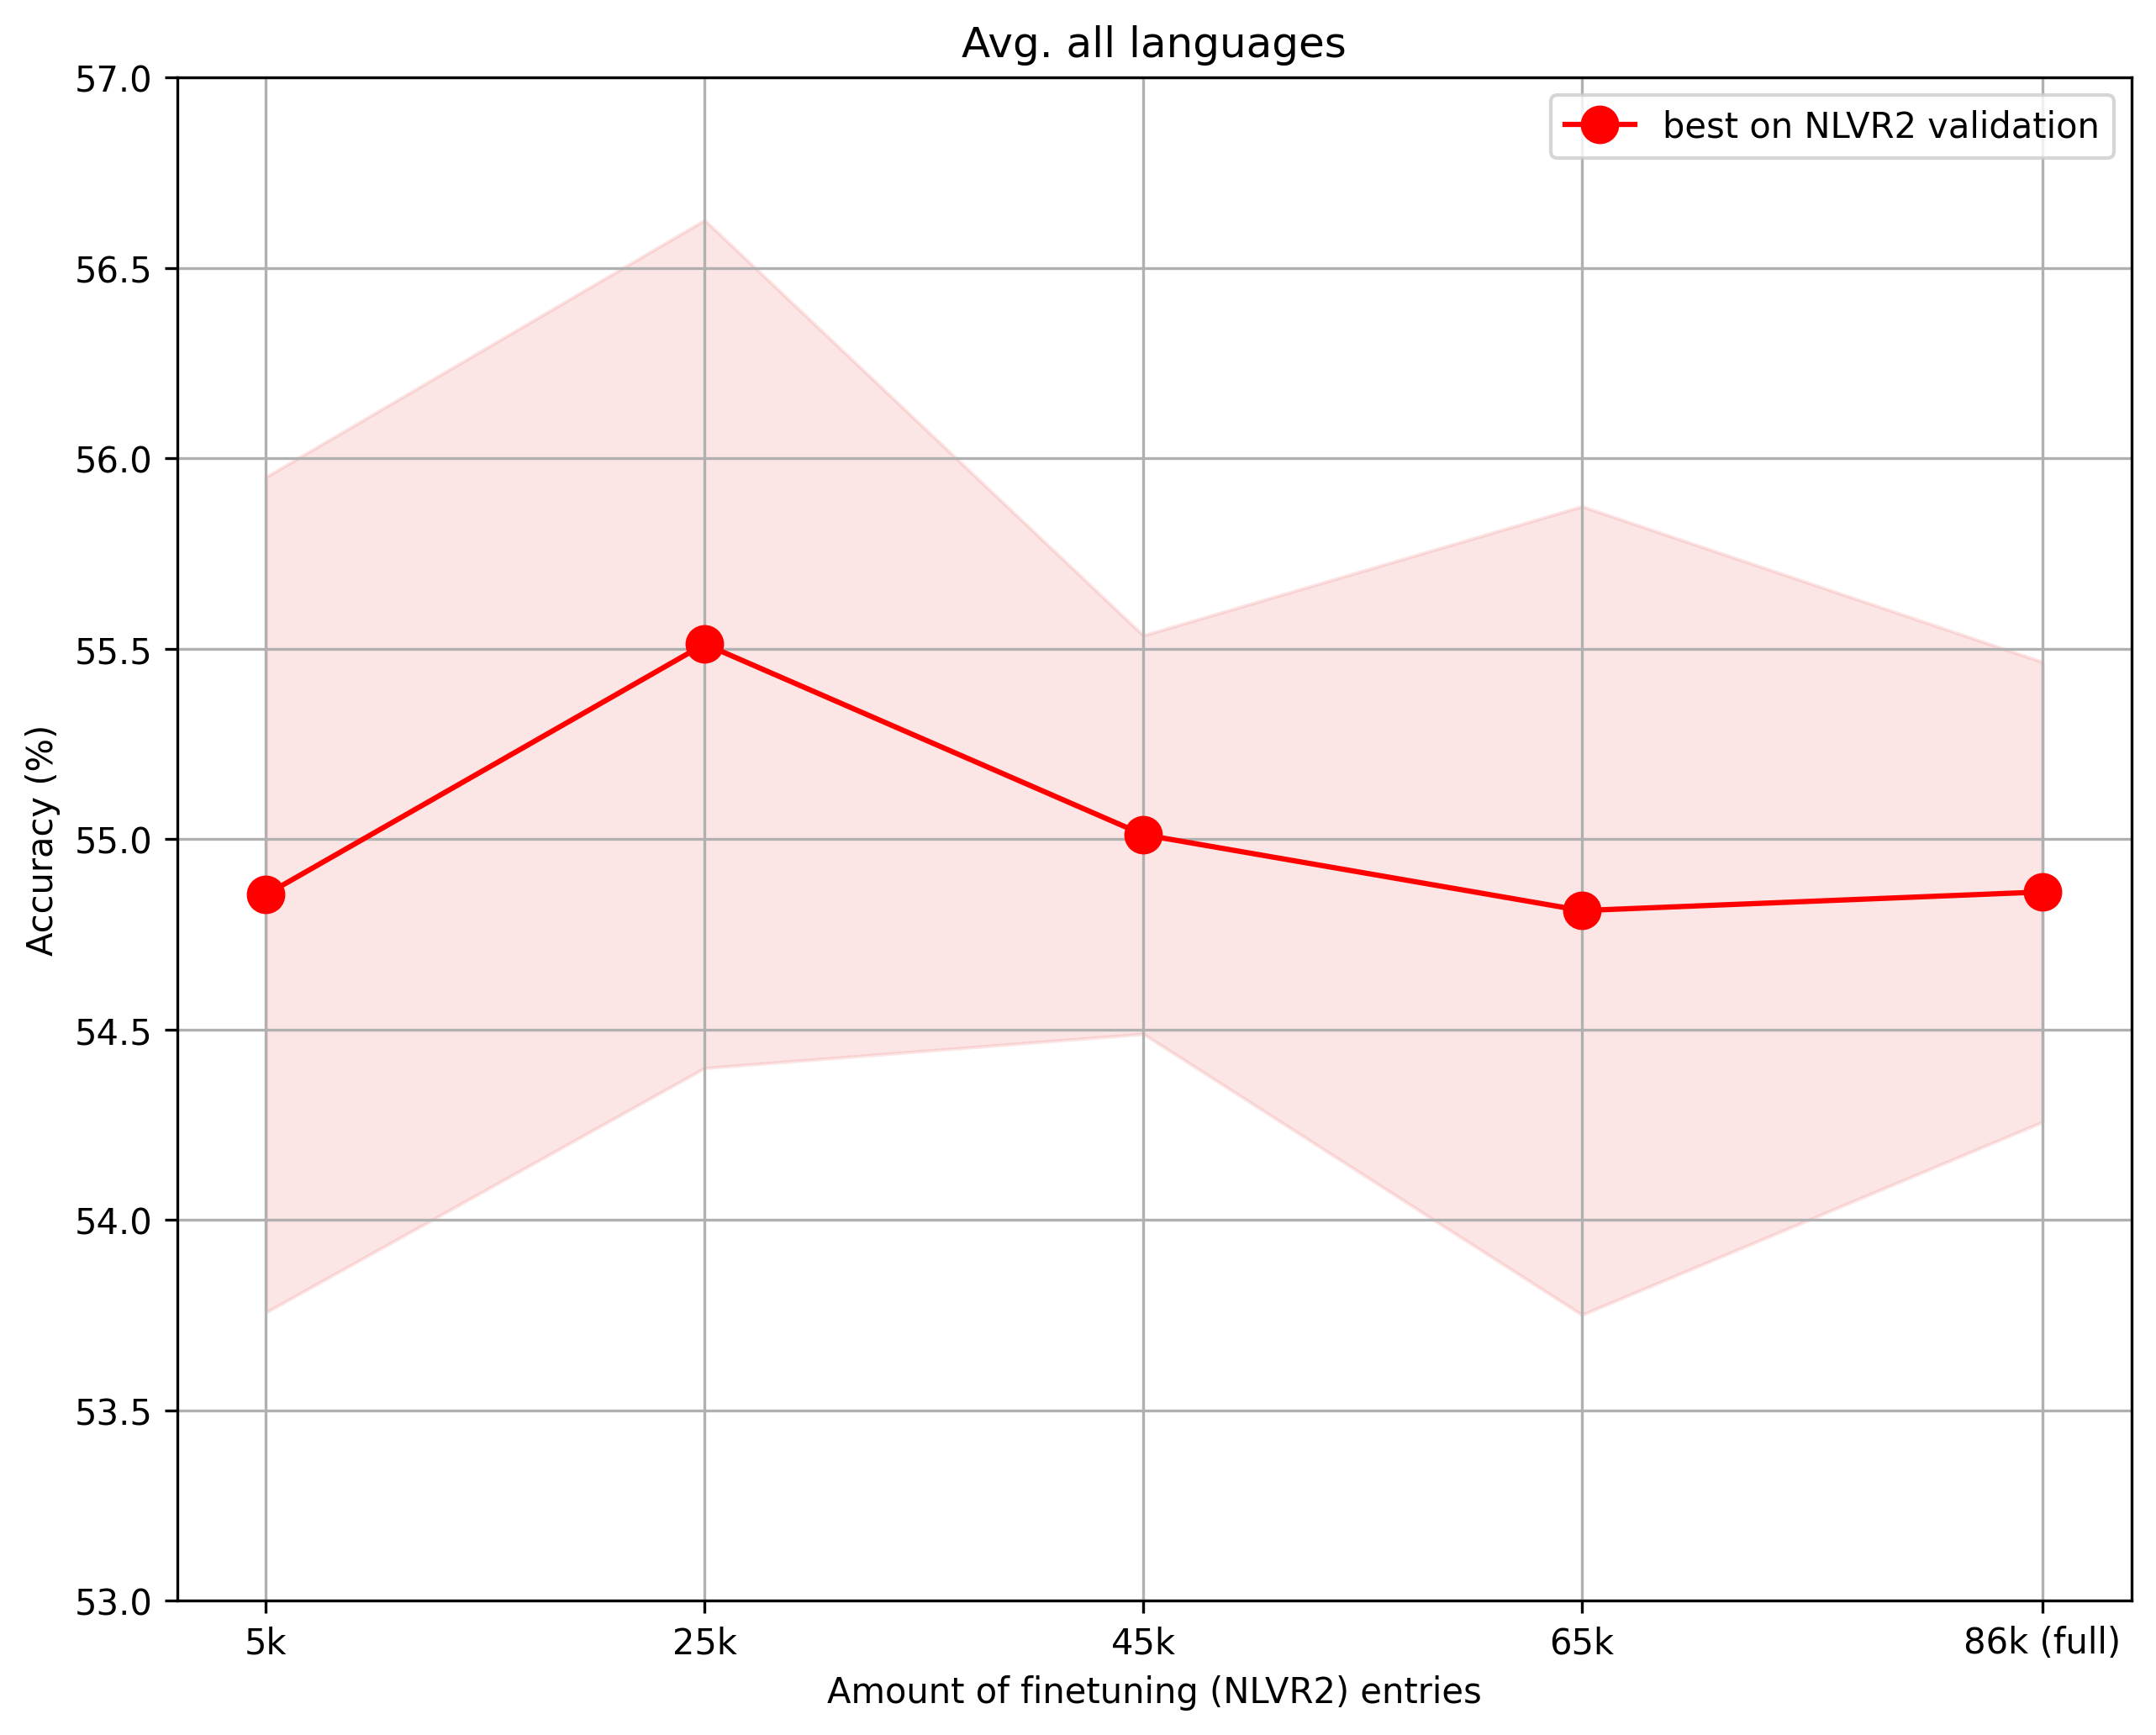

In [38]:
plot_results("Avg. all languages", means_all, stds_all, [53, 57])